<a href="https://colab.research.google.com/github/Martin-Tello/CNN/blob/main/Copy_of_Resnet50OCLUSIONBW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras-resnet

In [3]:
!pip install tensorflow==2.1

In [2]:
!pip install keras==2.3.1

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
import tensorflow
print(tensorflow.__version__)

2.1.0


In [4]:
pip install --upgrade keras_applications

In [5]:
!pip install Keras-Preprocessing

In [6]:
!pip install mlxtend --upgrade

In [7]:
!pip install keras_vggface

In [8]:
pip install --upgrade keras_applications

In [1]:
pip install 'h5py==2.10.0' --force-reinstall

  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.14.1 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
width_shape = 128
height_shape = 128
num_classes = 11
epochs = 50
batch_size = 256


In [11]:
train_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/MTP/TRAIN'  
validation_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/MTP/VALIDATION'

In [12]:
train_datagen = ImageDataGenerator(  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

Found 10815 images belonging to 11 classes.
Found 3850 images belonging to 11 classes.


In [27]:
nb_train_samples = 10815 
nb_validation_samples = 3850 

In [28]:
from tensorflow.keras.applications.resnet50 import ResNet50

image_input = Input(shape=(width_shape, height_shape, 3))

m_Resnet50 = ResNet50(input_tensor=image_input, include_top=False,weights='imagenet')

m_Resnet50.summary()

last_layer = m_Resnet50.layers[-1].output

x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x=Dropout(0.3)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x=Dropout(0.3)(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-6]:
    layer.trainable = False

    
custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [29]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 42 steps, validate for 15 steps
Epoch 1/50
42/42 [==============================] - 176s 4s/step - loss: 3.6179 - accuracy: 0.0914 - val_loss: 2.8956 - val_accuracy: 0.1484
Epoch 2/50
42/42 [==============================] - 122s 3s/step - loss: 3.0135 - accuracy: 0.1509 - val_loss: 2.5206 - val_accuracy: 0.1969
Epoch 3/50
42/42 [==============================] - 122s 3s/step - loss: 2.5851 - accuracy: 0.1997 - val_loss: 2.3388 - val_accuracy: 0.2357
Epoch 4/50
42/42 [==============================] - 122s 3s/step - loss: 2.2650 - accuracy: 0.2627 - val_loss: 2.1677 - val_accuracy: 0.2849
Epoch 5/50
42/42 [==============================] - 123s 3s/step - loss: 1.9965 - accuracy: 0.3425 - val_loss: 2.0780 - val_accuracy: 0.3219
Epoch 6/50
42/42 [==============================] - 122s 3s/step - loss: 1.8053 - accuracy: 0.3983 - val_loss: 2.0232 - val_acc

In [30]:
custom_model.save("model_RESNET50OCLUSIONBW.h5")

In [31]:
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

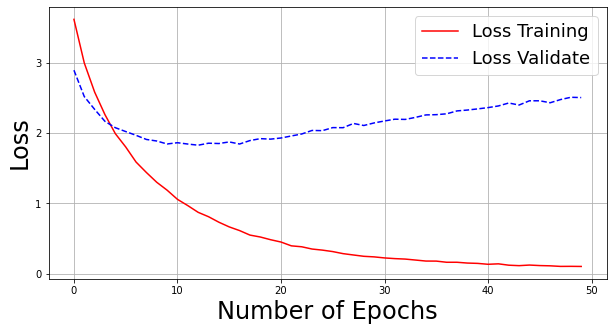

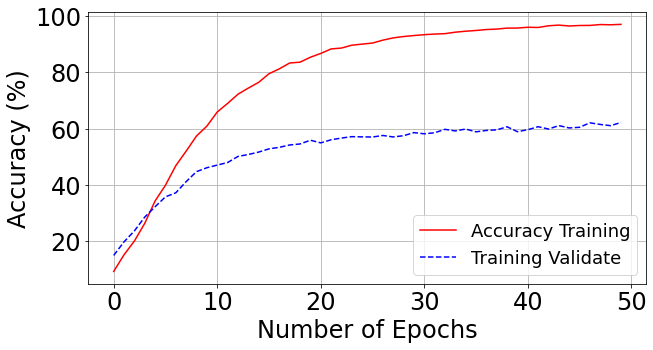

In [32]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

Sujeto 4


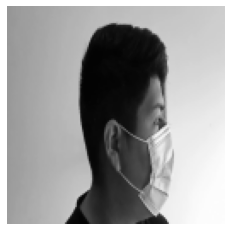

In [33]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model

names = ['Sujeto 1','Sujeto 2','Sujeto 3','Sujeto 4','Sujeto 5','Sujeto 6','Sujeto 7','Sujeto 8','Sujeto 9',
        'Sujeto 10','Sujeto 11']
         
modelt = load_model("/content/model_RESNET50OCLUSIONBW.h5")
#modelt = custom_model

imaget_path = "/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/MTP/TEST/FLAVIO/frame19.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 1100 images belonging to 11 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       100
           1     1.0000    0.9800    0.9899       100
           2     1.0000    0.7200    0.8372       100
           3     0.9346    1.0000    0.9662       100
           4     0.9434    1.0000    0.9709       100
           5     0.8065    1.0000    0.8929       100
           6     1.0000    0.9300    0.9637       100
           7     0.9901    1.0000    0.9950       100
           8     1.0000    1.0000    1.0000       100
           9     0.0000    0.0000    0.0000       100
          10     0.0000    0.0000    0.0000       100

    accuracy                         0.7845      1100
   macro avg     0.7886    0.7845    0.7833      1100
weighted avg     0.7886    0.7845    0.7833      1100



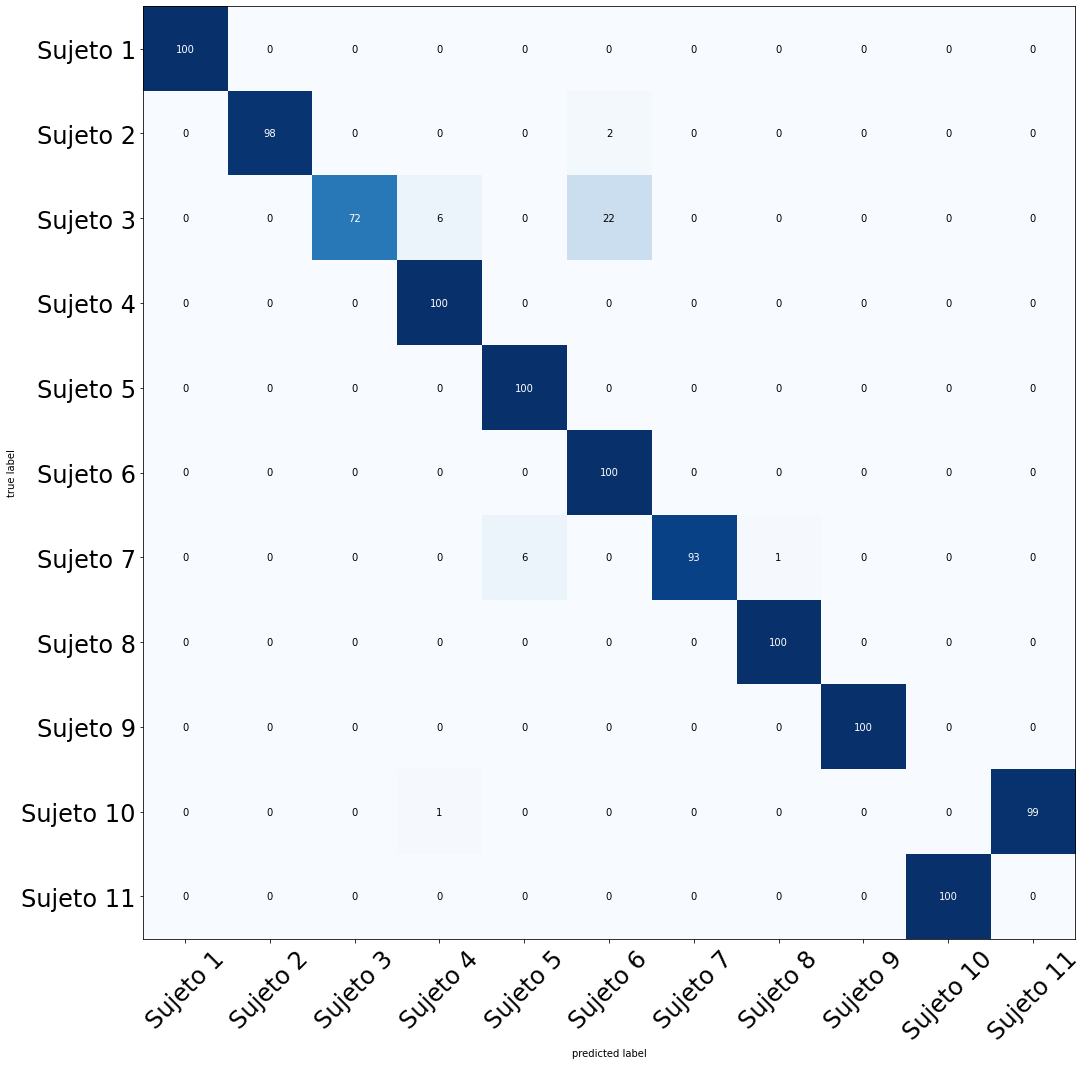

In [34]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['Sujeto 1','Sujeto 2','Sujeto 3','Sujeto 4','Sujeto 5','Sujeto 6','Sujeto 7','Sujeto 8','Sujeto 9',
        'Sujeto 10','Sujeto 11']


test_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/MTP/TEST'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("/content/model_RESNET50OCLUSIONBW.h5")
#modelt = custom_model

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(15,15), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))